<a href="https://colab.research.google.com/github/Diishasing/MAXIMUM_REVENUE-Statistical-project/blob/main/max_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***MAXIMUM REVENUE FOR THE DRIVERS***




#AGENDA
1. Problem statement
2. Research question
3. Data overview
4. Methodology: descriptive analysis, hypothesis testing and regression analysis(what would be the fare_amount for trip_duration)
5. Journey insights[all graphs and bar charts]
6. Recommendations

**PROBLEM STATEMENT:**

---


In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

**RESEARCH QUESTION:**

---
Is there a relationship between total fare amount and payment type?
Can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?


IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

LOADING DATASETS

**DATA OVERVIEW:**

---

For this analysis, we utilized the comprehensive dataset of NYC Taxi Trip records, used data cleaning and feature engineering procedures to concentrate solely on the relevant columns essential for our investigation.

In [ ]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(6405008, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


EXPLORATORY DATA ANALYSIS

In [ ]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [ ]:
#change date column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [ ]:
#coverting duration to minutes
df['duration'] = df['duration'].dt.total_seconds()/60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


RELEVANT COLUMNS USED FOR THIS PROBLEM STATMENT:

---


*   passenger_count (1 to 5)
*   payment_type (card or cash)
*   fare_amount
*   trip_distance (miles)
*   duration (minutes)




In [ ]:
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [ ]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [ ]:
df.isnull().sum()

,0
passenger_count,65441
payment_type,65441
fare_amount,0
trip_distance,0
duration,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [ ]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.581981
2,0.190350
3,0.066360
5,0.062937
6,0.039272
4,0.036046
0,0.023033
7,0.000009
9,0.000006


In [ ]:
df['payment_type'].value_counts(normalize=True)


,proportion
payment_type,
1,6.782670e-01
2,3.075731e-01
3,8.721480e-03
4,5.438084e-03
5,3.324622e-07


In [ ]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [ ]:
df['payment_type'] = df['payment_type'].map({1:'Card', 2: 'Cash'})

In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [ ]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a0854c80ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0854c81420>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0854c80c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7a0854c81960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0854c81c00>],
 'means': []}

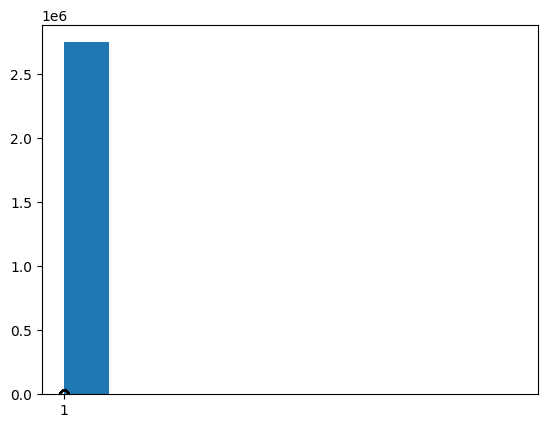

In [ ]:
plt.hist(df['fare_amount'])
plt.boxplot(df['fare_amount'])

In [ ]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

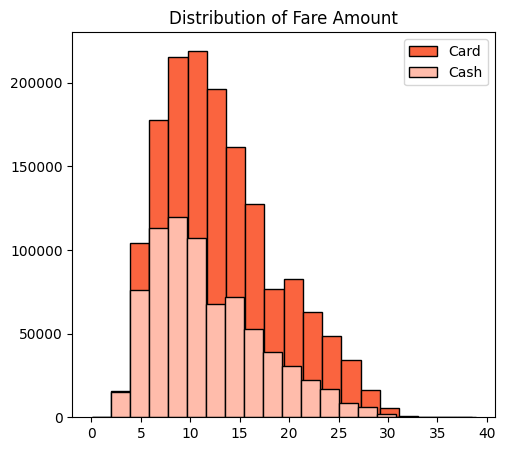

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB')
plt.legend(['Card', 'Cash'])
plt.show()

**JOURNEY INSIGHTS #1:**

---
Customers paying with cards tend to have a slightly higher average trip distance and fare amount compared to those paying the cash.


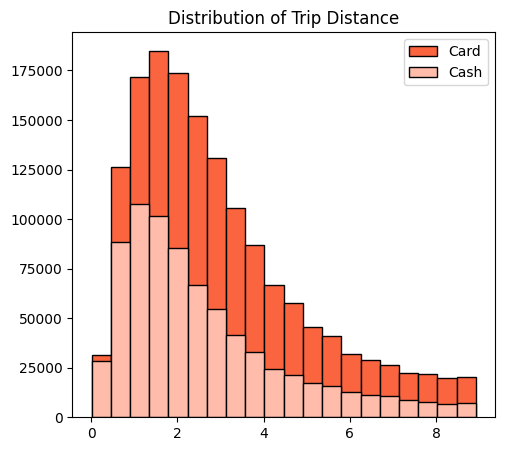

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB')
plt.legend(['Card', 'Cash'])
plt.show()

**JOURNEY INSIGHTS #2:**

---

Indicates that customer prefers to pay more with cards when they have high fare amount and long trip distance.

In [ ]:
df.groupby('payment_type').agg({'fare_amount' : ['mean', 'std'],
                                'trip_distance' : ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.096503  5.831808      2.986372  1.985248
Cash           11.745393  5.597290      2.597434  1.906750

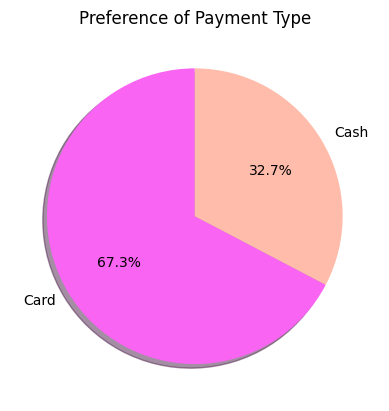

In [ ]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle= 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA64F3', '#FFBCAB'])
plt.show()

**JOURNEY INSIGHTS #3:**

---
This indicates a strong preferences among customers for using card payments over cash, potentially due to convenience, security, or incentives offered for card transactions.


In [ ]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [ ]:
passenger_count['percent'] = (passenger_count['count']/passenger_count['count'].sum())

In [ ]:
passenger_count

,payment_type,passenger_count,count,percent
0,Card,1,907993,0.395535
1,Card,2,327436,0.142636
2,Card,3,122338,0.053292
3,Card,4,63635,0.027720
4,Card,5,123948,0.053993
5,Cash,1,460098,0.200425
6,Cash,2,155392,0.067691
7,Cash,3,54478,0.023731
8,Cash,4,32701,0.014245
9,Cash,5,47591,0.020731


In [ ]:
rf = pd.DataFrame(columns = ['payment_type', 1, 2, 3, 4, 5])
rf['payment_type'] = ['Card', 'Cash']
rf.iloc[0, 1:] = passenger_count.iloc[0:5, -1]
rf.iloc[1, 1:] = passenger_count.iloc[5:, -1]
rf

,payment_type,1,2,3,4,5
0,Card,0.395535,0.142636,0.053292,0.02772,0.053993
1,Cash,0.200425,0.067691,0.023731,0.014245,0.020731


**PASSENGER COUNT ANALYSIS:**

---

* Among card payments, rides with a single passenger (passenger_count = 1) comprise the largest proportion, constituting 40.08% of all card transactions.
* Similarly, cash payments are predominantly associated with single-passenger ride, making up 20.04% of all cash transactions
* There is a noticeable decrease in the percentage of transactions as the passenger count increases, suggesting that larger groups are less likely to use taxis or may opt for alternative payments methods.
* These insights emphasize the importance of considering both payment method and passenger count when analyzing transaction data, as they provide valuable insights into customer behavior and preferences.

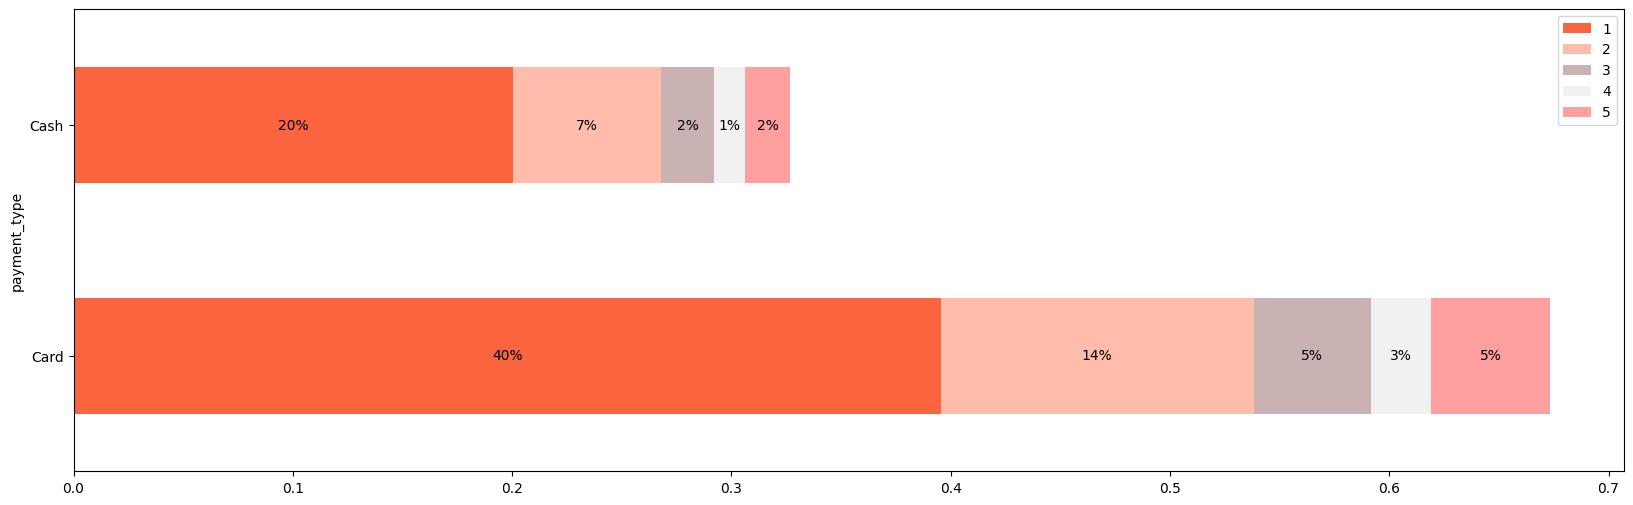

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
rf.plot(x = 'payment_type', kind ='barh', stacked=True, color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'], ax=ax)

#ADD PERCENTAGES AND TEXTS
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.text(x+width/2,
          y+height/2,
          '{:.0%}'.format(width),
          horizontalalignment='center',
          verticalalignment='center')

plt.show()

**NULL HYPOTHESIS:**

---


There is no difference in average fare between customers who use credit cards and customers who use cash

**ALTERNATE HYPOTHESIS:**

---


There is a difference in average fare between customers who use credit cards and customers who use cash


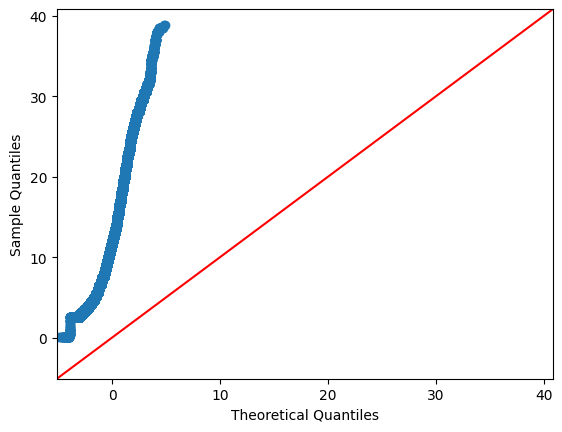

In [ ]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [ ]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']


Performing T-statistic and finding the p-value

In [ ]:
t_stat, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T-statistics', t_test, 'p_value', p_value)

T-statistics 169.19783114904993 p_value 0.0


With a T-statistic of 165.5 and a P-value of less than 0.05, we reject the null hypothesis, suggesting that there is indeed a significant difference in average fare between the two payment methods.




Hence, the alternate hypothesis is correct since the p-value is less than 0.05

**RECOMMENDATIONS:**

---



*   Implement strategies such as offering incentives or discounts for credit card transactions to incentivize customers to choose this payment method.
*   Provide seamless and secure credit card payment options to enhance customer convenience and encourage adoption of this preferred payment method.
*   Encourage customers to pay with credit cards to capitalize on the potential for generating more revenue for taxi can drivers.



# **THANK YOU!** :>